In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("novagen_dataset.csv")
df.head()
df.isnull().sum() #no null
df.dtypes #need to convert bool using encoding
#all the features seem important thus not removing 

Age                      float64
BMI                      float64
Blood_Pressure           float64
Cholesterol              float64
Glucose_Level            float64
Heart_Rate               float64
Sleep_Hours              float64
Exercise_Hours           float64
Water_Intake             float64
Stress_Level             float64
Target                     int64
Smoking                    int64
Alcohol                    int64
Diet                       int64
MentalHealth               int64
PhysicalActivity           int64
MedicalHistory             int64
Allergies                  int64
Diet_Type__Vegan            bool
Diet_Type__Vegetarian       bool
Blood_Group_AB              bool
Blood_Group_B               bool
Blood_Group_O               bool
dtype: object

Target
1    4979
0    4570
Name: count, dtype: int64


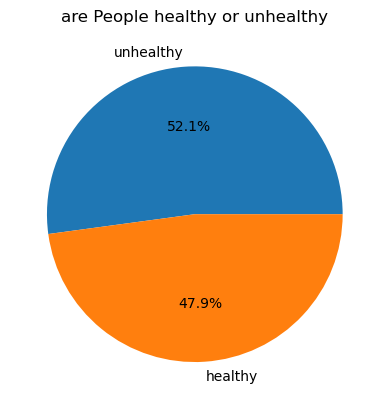

In [5]:
#analysing 
classes_count = df["Target"].value_counts()
plt.pie(classes_count, labels=["unhealthy", "healthy"], autopct="%1.1f%%")
plt.title("are People healthy or unhealthy")
print(classes_count)





In [6]:
#label enconding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Diet_Type__Vegan"] = le.fit_transform(df["Diet_Type__Vegan"])
df["Diet_Type__Vegetarian"] = le.fit_transform(df["Diet_Type__Vegetarian"])
df["Blood_Group_AB"] = le.fit_transform(df["Blood_Group_AB"])
df["Blood_Group_B"] = le.fit_transform(df["Blood_Group_B"])
df["Blood_Group_O"] = le.fit_transform(df["Blood_Group_O"])
df.dtypes
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type__Vegan,Diet_Type__Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,...,1,2,1,0,1,0,1,1,0,0
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,...,1,2,1,2,2,0,0,1,0,0
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,...,2,0,0,1,0,1,0,0,0,0
3,25.0,21.0,150.0,199.0,102.0,70.0,7.0,3.0,3.0,3.0,...,1,2,1,2,0,1,0,0,1,0
4,24.0,26.0,146.0,202.0,99.0,76.0,10.0,2.0,5.0,1.0,...,2,0,2,0,2,0,1,0,1,0


<Axes: >

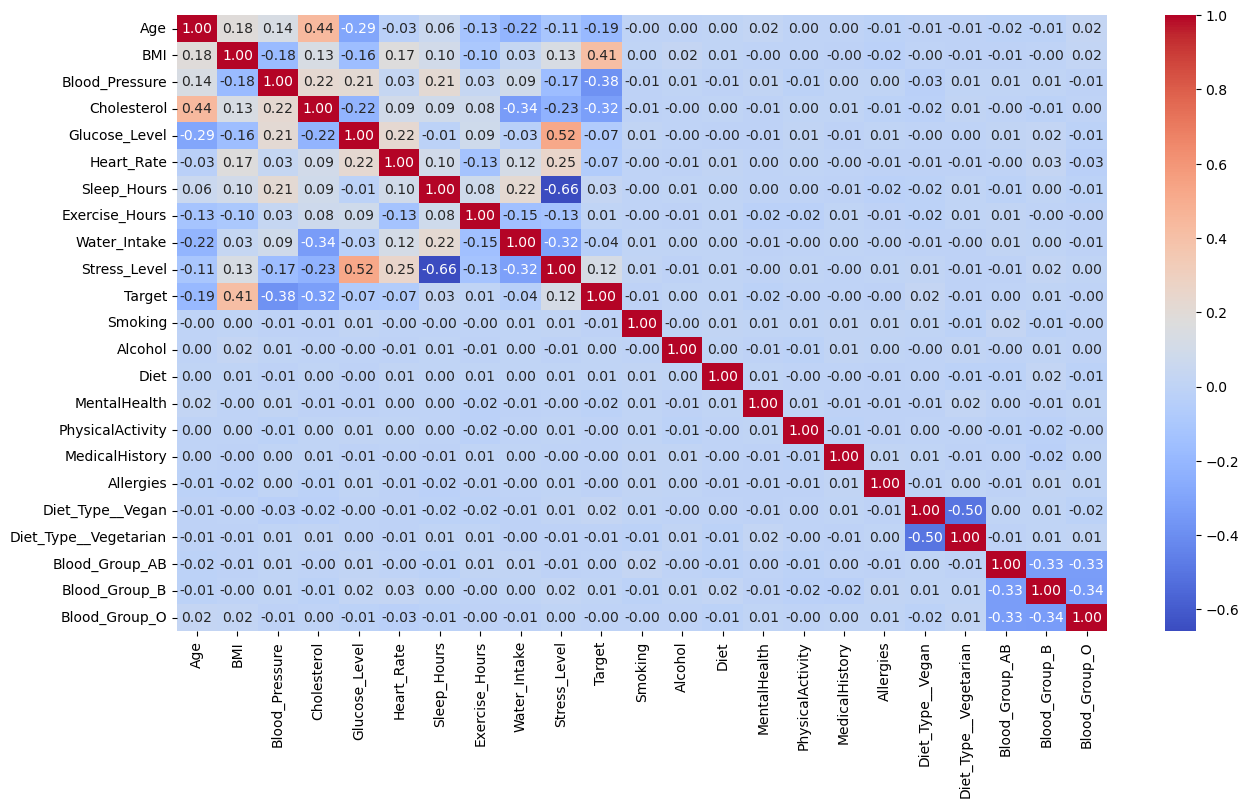

In [7]:
nums_cols = df.select_dtypes(include = "number")
corr_matrix = nums_cols.corr()
#would like to see the relatonship with the target 
nums_cols.corr()["Target"].sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
#BMI influnces  into saying at risk to a certIN POINT while blood_pressure into saying not a risk.  


# train - test - split & feature scaling

In [10]:

X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.84338185, -0.33320265, -1.19568435, ..., -0.5691369 ,
        -0.58405186, -0.58042385],
       [ 1.76273016,  0.17986629, -0.01334364, ...,  1.7570465 ,
        -0.58405186, -0.58042385],
       [-1.25058685,  0.69293523,  0.66739797, ...,  1.7570465 ,
        -0.58405186, -0.58042385],
       ...,
       [-0.80266135, -0.33320265, -0.44328572, ..., -0.5691369 ,
        -0.58405186,  1.7228789 ],
       [-0.59905885,  0.69293523, -0.04917215, ..., -0.5691369 ,
        -0.58405186,  1.7228789 ],
       [-1.12842535, -0.33320265,  0.8465405 , ...,  1.7570465 ,
        -0.58405186, -0.58042385]])

# train and evaluate models

#the probem statements indirectly conveys that the people that are unhealthy (at risk) is worse than falsely flagging healthy ones thus recall(reduce FN) parameter should be the priority then mayb precision  

In [11]:
#logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
#evaluation 
print("logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))
      

logistic Regression Model
Precision:  0.8285994123408423
Recall:  0.8376237623762376
F1_score:  0.8330871491875923
Accuracy:  0.8225130890052356
CM:  [[725 175]
 [164 846]]


In [12]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier


neighbors = [3,5,7,9,11,13,15,17]
#finding best n_neighbours 
for n in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    #evaluation 
    print("KNN Model for n: ", n)
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1_score: ", f1_score(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("CM: ", confusion_matrix(y_test, y_pred))
#n-neighbors of 13 is the best - keeping recall high

KNN Model for n:  3
Precision:  0.8717171717171717
Recall:  0.8544554455445544
F1_score:  0.863
Accuracy:  0.856544502617801
CM:  [[773 127]
 [147 863]]
KNN Model for n:  5
Precision:  0.8859737638748738
Recall:  0.8693069306930693
F1_score:  0.8775612193903048
Accuracy:  0.8717277486910995
CM:  [[787 113]
 [132 878]]
KNN Model for n:  7
Precision:  0.8902195608782435
Recall:  0.8831683168316832
F1_score:  0.8866799204771372
Accuracy:  0.8806282722513089
CM:  [[790 110]
 [118 892]]
KNN Model for n:  9
Precision:  0.8942115768463074
Recall:  0.8871287128712871
F1_score:  0.8906560636182903
Accuracy:  0.8848167539267016
CM:  [[794 106]
 [114 896]]
KNN Model for n:  11
Precision:  0.889
Recall:  0.8801980198019802
F1_score:  0.8845771144278607
Accuracy:  0.8785340314136125
CM:  [[789 111]
 [121 889]]
KNN Model for n:  13
Precision:  0.8895463510848126
Recall:  0.8930693069306931
F1_score:  0.8913043478260869
Accuracy:  0.8848167539267016
CM:  [[788 112]
 [108 902]]
KNN Model for n:  15
Pr

In [13]:
#Naive Bayes 
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)

#evaluation 
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.8450413223140496
Recall:  0.80990099009901
F1_score:  0.8270980788675429
Accuracy:  0.8209424083769633
CM:  [[750 150]
 [192 818]]


In [14]:
#SVM - SVC
#using kernel as rbf -default
from sklearn.svm import SVC
svc = SVC()
c_vals = [0.5,1,2,3,4,5]
for c in c_vals:
    svc = SVC(C = c, kernel="rbf")
    svc.fit(X_train_scaled, y_train)
    y_pred = svc.predict(X_test_scaled)
    print(" for c= ", c)
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
#since giving higher priority to recall then  precision 
#c= 2 is the best for this model

 for c=  0.5
Precision:  0.9221789883268483
Recall:  0.9386138613861386
Accuracy:  0.9256544502617801
 for c=  1
Precision:  0.9324191968658179
Recall:  0.9425742574257425
Accuracy:  0.9335078534031414
 for c=  2
Precision:  0.9397828232971372
Recall:  0.9425742574257425
Accuracy:  0.937696335078534
 for c=  3
Precision:  0.9405351833498513
Recall:  0.9396039603960396
Accuracy:  0.9366492146596859
 for c=  4
Precision:  0.9395441030723488
Recall:  0.9386138613861386
Accuracy:  0.9356020942408377
 for c=  5
Precision:  0.9378084896347483
Recall:  0.9405940594059405
Accuracy:  0.9356020942408377


In [30]:
#Decision Tree - use without scaling data 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred_test))
print("Recall: ", recall_score(y_test, y_pred_test))
print("training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("testing Accuracy: ", accuracy_score(y_test, y_pred_test))
print(" -------------------------- ")
#Precision:  0.9020979020979021
#Recall:  0.8940594059405941
#training Accuracy:  1.0
#testing Accuracy:  0.8926701570680629
#pre-prunning
max_depths = [2,3,4,5,6,7,8,9,10]
min_sample = [5,10,15,20,25,30]
for sample in min_sample:
    dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=sample)
    dtc.fit(X_train, y_train)
    y_pred_train = dtc.predict(X_train)
    y_pred_test = dtc.predict(X_test)
    print("for sample: ",sample)
    print("Precision: ", precision_score(y_test, y_pred_test))
    print("Recall: ", recall_score(y_test, y_pred_test))
    print("training Accuracy: ", accuracy_score(y_train, y_pred_train))
    print("testing Accuracy: ", accuracy_score(y_test, y_pred_test))
print(" -------------------------- ")
#overall for depth = 7 we getting high result for recall but a bit lower for precision and the
#difference between testing and training is 1.2 meaning not much of overfitting.
#overall while keeping depth =7 ,sample = 20 is the best giving high recall , slightly lower precision  
#and difference between testing and training accuracy also reduced 

#final 
#for depth=7 and sample=20
#Precision:  0.8672161172161172
#Recall:  0.9376237623762376
#training Accuracy:  0.8972378583584238
#testing Accuracy:  0.8910994764397906


Precision:  0.899009900990099
Recall:  0.899009900990099
training Accuracy:  1.0
testing Accuracy:  0.8931937172774869
 -------------------------- 
for sample:  5
Precision:  0.8658088235294118
Recall:  0.9326732673267327
training Accuracy:  0.9003796308417332
testing Accuracy:  0.8879581151832461
for sample:  10
Precision:  0.8666053357865685
Recall:  0.9326732673267327
training Accuracy:  0.8992014661604922
testing Accuracy:  0.8884816753926702
for sample:  15
Precision:  0.8669724770642202
Recall:  0.9356435643564357
training Accuracy:  0.8977614871056421
testing Accuracy:  0.8900523560209425
for sample:  20
Precision:  0.8672161172161172
Recall:  0.9376237623762376
training Accuracy:  0.8972378583584238
testing Accuracy:  0.8910994764397906
for sample:  25
Precision:  0.8656307129798904
Recall:  0.9376237623762376
training Accuracy:  0.896321508050792
testing Accuracy:  0.8900523560209425
for sample:  30
Precision:  0.865137614678899
Recall:  0.9336633663366337
training Accuracy:  

In [31]:
#feature engineering - might apply on bmi or blood_pressure 
#the features are always being scaled


# Ensembel Learning

In [39]:
# Homogenous learning
#bagging - using decision tree
#randomforest algorithm 
from sklearn.ensemble import RandomForestClassifier
n = [201,301,401,501,601,701]
for i in n: 
    rf = RandomForestClassifier(
        n_estimators=i,
        oob_score=True
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("for n= ",i)
    print("OOB score: ", rf.oob_score_ * 100, "%") # to evaulate performace of this model
    print("testng accuracy: ", accuracy_score(y_test,y_pred) * 100, "%")
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
#overall n=501 gives the highest recall and sine oob_score canges are minute it could be neglected 
#for n=  501
#OOB score:  93.91281581358817 %
#testng accuracy:  94.76439790575915 %
#Precision:  0.9513888888888888
#Recall:  0.9495049504950495

for n=  201
OOB score:  93.82118078282498 %
testng accuracy:  93.87434554973822 %
Precision:  0.9442786069651742
Recall:  0.9396039603960396
for n=  301
OOB score:  93.91281581358817 %
testng accuracy:  94.29319371727749 %
Precision:  0.941234084231146
Recall:  0.9514851485148514
for n=  401
OOB score:  93.86045293886635 %
testng accuracy:  94.18848167539267 %
Precision:  0.9454905847373637
Recall:  0.9445544554455445
for n=  501
OOB score:  93.88663437622725 %
testng accuracy:  94.08376963350786 %
Precision:  0.941871921182266
Recall:  0.9465346534653465
for n=  601
OOB score:  94.00445084435135 %
testng accuracy:  94.24083769633508 %
Precision:  0.9473161033797217
Recall:  0.9435643564356435
for n=  701
OOB score:  93.84736222018589 %
testng accuracy:  94.3979057591623 %
Precision:  0.9474727452923687
Recall:  0.9465346534653465


In [ ]:
#boosting - Gradient Boosting - using decision trees
from sklearn.ensemble import GradientBoostingClassifier 
n = [201,301,401,501,601,701]
max_depths = [2,3,4,5,6,7,8,9,10]
for depth in max_depths:
    gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=601, max_depth=depth)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    print("for depth = ", depth)
    print("testng accuracy: ", accuracy_score(y_test,y_pred) * 100, "%")
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
#n=601 gives better result 
#for n =  601
#testng accuracy:  93.92670157068062 %
#Precision:  0.9443339960238568
#Recall:  0.9405940594059405
    
#with n=601 ,the best depth is depth=9
#result: for depth =  9
#testng accuracy:  95.02617801047121 %
#Precision:  0.9552238805970149
#Recall:  0.9504950495049505


In [55]:
#hetergenous learning - using DT,LR,SVC as base models for both 
#voting 
from sklearn.ensemble import VotingClassifier
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=20)
rf = RandomForestClassifier(n_estimators=501)
lr = LogisticRegression()
svc = SVC(C = 2, kernel="rbf",probability=True)

#using scaled data - decision tree are robust to scaling therefore its fine

vc = VotingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('rf',rf)],
    voting="soft" #using probability based
)
vc.fit(X_train_scaled, y_train)
y_pred = vc.predict(X_test_scaled)
print("testng accuracy: ", accuracy_score(y_test,y_pred) * 100, "%")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#with dt
#testng accuracy:  91.98952879581151 %
#Precision:  0.914811229428848
#Recall:  0.9356435643564357

#replacing dt with random forest - must better results
#testng accuracy:  93.61256544502618 %
#Precision:  0.9361493123772102
#Recall:  0.9435643564356435

testng accuracy:  91.98952879581151 %
Precision:  0.914811229428848
Recall:  0.9356435643564357


In [62]:
#stacking - knn-folds (cv) will be applied.
from sklearn.ensemble import StackingClassifier
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=20)
rf = RandomForestClassifier(n_estimators=501)
lr = LogisticRegression()
svc = SVC(C = 2, kernel="rbf",probability=True)
meta_model = LogisticRegression()

sc = StackingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('rf', rf)],
    cv=5,
    final_estimator = meta_model
)
sc.fit(X_train_scaled, y_train)
y_pred = sc.predict(X_test_scaled)
print("testng accuracy: ", accuracy_score(y_test,y_pred) * 100, "%")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
#with dt 
#testng accuracy:  93.97905759162303 %
#Precision:  0.945273631840796
#Recall:  0.9405940594059405

#with rf - better results 
#testng accuracy:  94.76439790575915 %
#Precision:  0.955
#Recall:  0.9455445544554455

testng accuracy:  94.76439790575915 %
Precision:  0.955
Recall:  0.9455445544554455


# Final Results